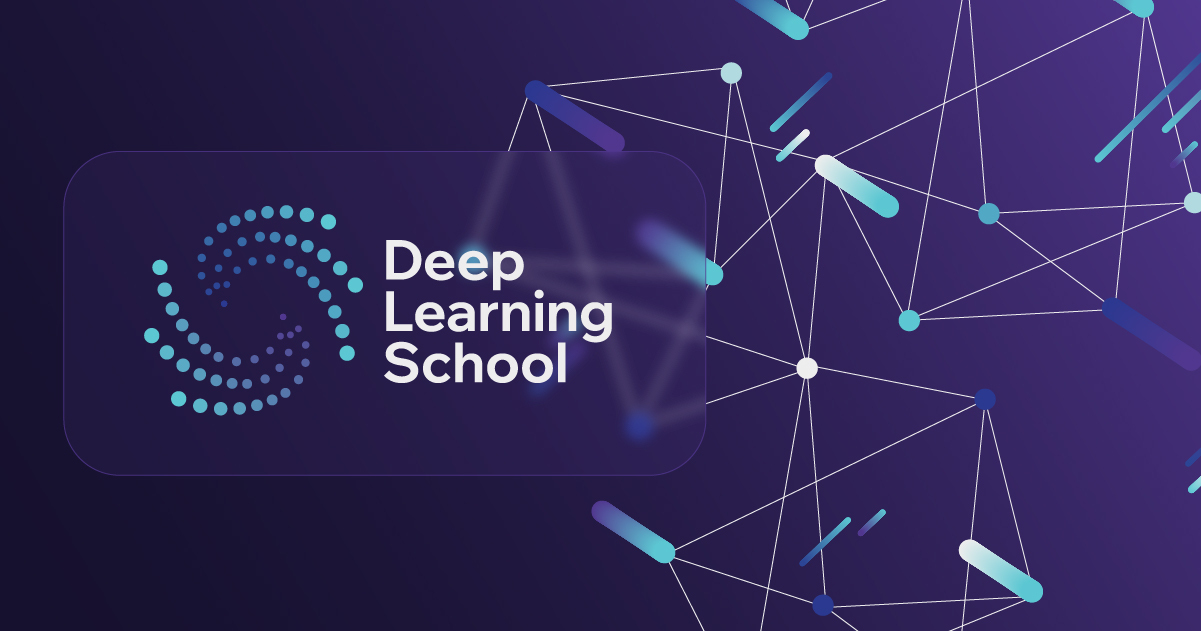

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

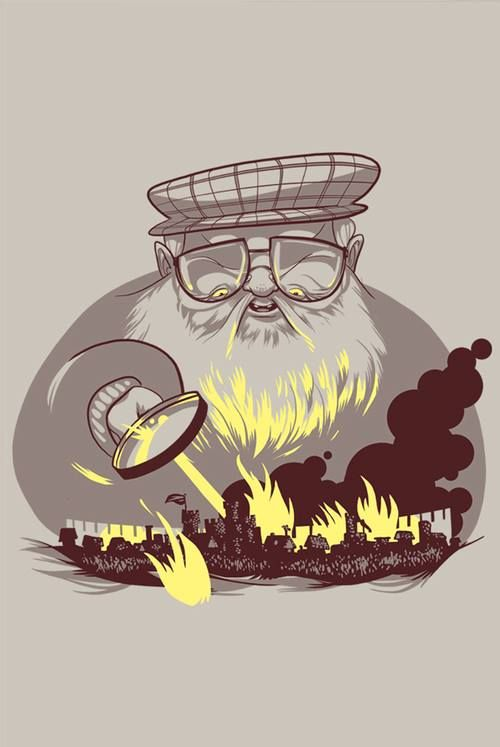

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 58.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 70.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [157]:
df_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
df_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [158]:
df_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [159]:
df_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [160]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [161]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [162]:
df_train['popularity'].describe()

,popularity
count,1557.000000
mean,0.062400
std,0.121416
min,0.000000
25%,0.013378
50%,0.023411
75%,0.063545
max,1.000000


In [163]:
df_train['isPopular'] = df_train['popularity'].apply(lambda x: 1 if x >= 0.7 else 0)
df_test['isPopular'] = df_test['popularity'].apply(lambda x: 1 if x >= 0.7 else 0)

In [164]:
df_train['boolDeadRelations'] = df_train['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
df_test['boolDeadRelations'] = df_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [165]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def replace_cult(x):
    for key, value in cult.items():
        if x in value:
            return key
    return x
df_train['culture'] = df_train['culture'].apply(replace_cult)
df_test['culture'] = df_test['culture'].apply(replace_cult)


In [166]:
df_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,NaN,0,0,100.0,0,0.050167,0,0
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.745819,1,0
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.010033,0,0
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,NaN,NaN,NaN,0,1,NaN,0,0.220736,0,0
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,NaN,NaN,1.0,1,0,38.0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,0
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,0
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,0,0.030100,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [167]:
column_to_drop = [
    'numDeadRelations',
    'isAliveSpouse',
    'isAliveHeir',
    'isAliveFather',
    'isAliveMother',
    'spouse',
    'heir',
    'father',
    'mother',
    'dateOfBirth',
    'name',
    'title',
    'book1',
    'book2',
    'book3',
    'book4',
    'book5',
    'popularity'
    ]
df_train = df_train.drop(column_to_drop, axis=1)
df_test = df_test.drop(column_to_drop, axis=1)

Лучше оставить:

✅ Демография и статус: House, Culture, Is noble, male, Age, Is married

✅ Популярность: Popularity score

Удалить:

❌ Утечки данных: dateOfBirth, Number dead relations, Is ... alive

❌ Неинформативные: name, Title, имена родственников

❌ Избыточные: book1...book5.

In [168]:
df_train['culture'] = df_train['culture'].fillna('Strangers')
df_test['culture'] = df_test['culture'].fillna('Strangers')

In [169]:
df_train['house'] = df_train['house'].fillna('Smallfolk')
df_test['house'] = df_test['house'].fillna('Smallfolk')

Здесь чтобы не терять болшое количество данных заменим NaN в культуре на "странников", а в доме звание людей без дома - простолюдины

In [170]:
df_train['age'].describe()

,age
count,279.000000
mean,35.290323
std,26.364864
min,0.000000
25%,16.000000
50%,24.000000
75%,49.000000
max,100.000000


In [171]:
df_train['age'] = df_train['age'].fillna(df_train['age'].mean() - 0.5 * df_train['age'].std())

Заменим NaN в возрасте на среднее значение по выборке с среднеквадратичным отклонением

In [172]:
df_test['age'] = df_test['age'].apply(lambda x: x if 0 <= x <= 100 else None)

In [173]:
df_test['age'] = df_test['age'].fillna(df_test['age'].mean() - 0.5 * df_test['age'].std())

Тоже самое сделаем и в тестовой выборке, но при этом данные приведем к реальному формату 0 - 100, так как в датасете есть данные сильно меньше 0

In [174]:
df_train

,male,culture,house,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,
1,1,Strangers,Smallfolk,0,0,22.107891,0,0,1
2,1,Rivermen,House Frey,1,1,97.000000,1,1,1
3,1,Strangers,House Swyft,0,1,22.107891,1,0,0
4,0,Strangers,House Arryn,1,1,23.000000,0,0,0
5,0,Dornish,House Santagar,1,1,29.000000,1,0,0
...,...,...,...,...,...,...,...,...,...
1553,1,Strangers,Smallfolk,0,1,22.107891,1,0,0
1554,0,Strangers,Smallfolk,0,0,22.107891,0,0,0
1555,1,Strangers,House Seaworth,0,0,22.107891,0,0,0


In [175]:
df_test

,male,culture,house,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,
1558,0,Strangers,House Blackwood,0,0,100.000000,0,0
1559,0,Asshai,R'hllor,0,0,27.311511,1,0
1560,0,Strangers,Brotherhood without banners,0,0,27.311511,0,0
1561,1,Strangers,House Trant,0,1,27.311511,0,0
1562,1,Riverlands,House Frey,1,0,38.000000,0,0
...,...,...,...,...,...,...,...,...
1942,1,Westeros,House Stark,0,0,27.311511,0,0
1943,1,Strangers,House Bolton,0,0,27.311511,0,0
1944,1,Strangers,Smallfolk,0,0,27.311511,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [176]:
print(df_train['isAlive'].dtype)  # Проверяем тип данных
print(df_train['isAlive'].unique())  # Уникальные значения
print("Распределение классов:\n", df_train['isAlive'].value_counts())
print("\nСоотношение (%):\n", (df_train['isAlive'].value_counts()) / len(df_train) * 100)

int64
[0 1]
Распределение классов:
 isAlive
1    1212
0     345
Name: count, dtype: int64

Соотношение (%):
 isAlive
1    77.842004
0    22.157996
Name: count, dtype: float64


Переменная категориальная, так как у нас всего два значения (0 1), что является задачей бинарной классификации. Как мы видим данные сильно несбалансированы 77 - 22 (%)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [177]:
df_train['culture'].value_counts()

,count
culture,
Strangers,1069
Northmen,103
Ironborn,91
Free Folk,46
Braavosi,39
Valyrian,28
Dornish,17
Ghiscari,17
Dothraki,17


In [178]:
from sklearn.preprocessing import TargetEncoder
encoder_culture = TargetEncoder()
encoder_house = TargetEncoder()
df_train['cultureEnc'] = encoder_culture.fit_transform(df_train[['culture']], df_train['isAlive'])
df_test['cultureEnc'] = encoder_culture.transform(df_test[['culture']])

df_train['houseEnc'] = encoder_house.fit_transform(df_train[['house']], df_train['isAlive'])
df_test['houseEnc'] = encoder_house.transform(df_test[['house']])

In [179]:
df_train = df_train.drop(['culture','house'], axis=1)
df_train

,male,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,cultureEnc,houseEnc
S.No,,,,,,,,,
1,1,0,0,22.107891,0,0,1,0.784536,0.795327
2,1,1,1,97.000000,1,1,1,0.753386,0.931676
3,1,0,1,22.107891,1,0,0,0.784124,1.000000
4,0,1,1,23.000000,0,0,0,0.772998,0.777849
5,0,1,1,29.000000,1,0,0,0.929696,0.778313
...,...,...,...,...,...,...,...,...,...
1553,1,0,1,22.107891,1,0,0,0.784124,0.798018
1554,0,0,0,22.107891,0,0,0,0.783211,0.802559
1555,1,0,0,22.107891,0,0,0,0.783211,0.482338


Используем TargetEncoder. Используем его так как категорий в данных много и OneHot тут не подойдет. Обработаем культуру и дом.

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   isMarried          1557 non-null   int64  
 2   isNoble            1557 non-null   int64  
 3   age                1557 non-null   float64
 4   isAlive            1557 non-null   int64  
 5   isPopular          1557 non-null   int64  
 6   boolDeadRelations  1557 non-null   int64  
 7   cultureEnc         1557 non-null   float64
 8   houseEnc           1557 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 121.6 KB


In [181]:
df_test = df_test.drop(['culture','house'], axis=1)
df_test

,male,isMarried,isNoble,age,isPopular,boolDeadRelations,cultureEnc,houseEnc
S.No,,,,,,,,
1558,0,0,0,100.000000,0,0,0.781101,0.000000
1559,0,0,0,27.311511,1,0,0.778420,1.000000
1560,0,0,0,27.311511,0,0,0.781101,0.756073
1561,1,0,1,27.311511,0,0,0.781101,0.778420
1562,1,1,0,38.000000,0,0,0.778420,0.898167
...,...,...,...,...,...,...,...,...
1942,1,0,0,27.311511,0,0,0.700241,0.768049
1943,1,0,0,27.311511,0,0,0.781101,0.826836
1944,1,0,0,27.311511,0,0,0.781101,0.803090


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

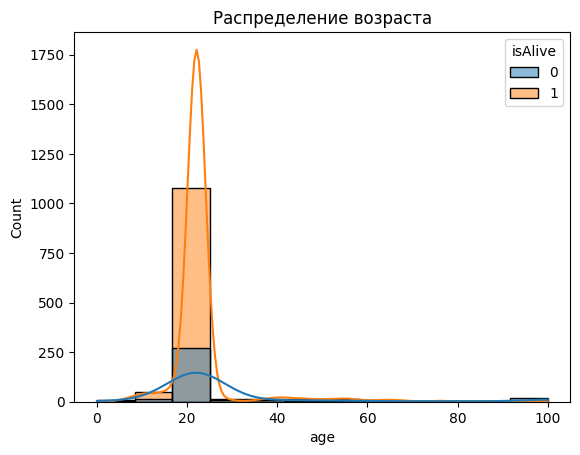

In [182]:
import seaborn as sns
sns.histplot(data=df_train, x='age', hue='isAlive', kde=True)
plt.title('Распределение возраста')
plt.show()

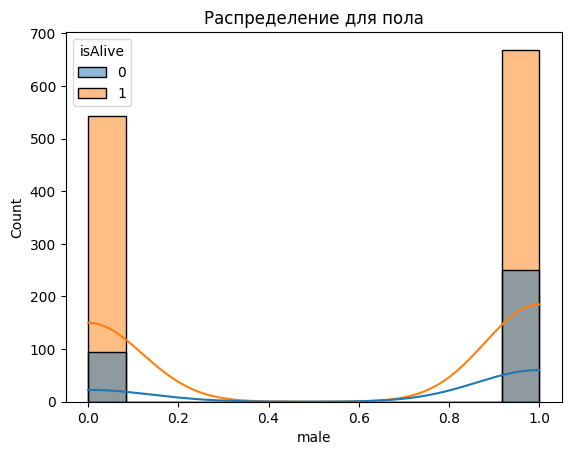

In [183]:
import seaborn as sns
sns.histplot(data=df_train, x='male', hue='isAlive', kde=True)
plt.title('Распределение для пола')
plt.show()

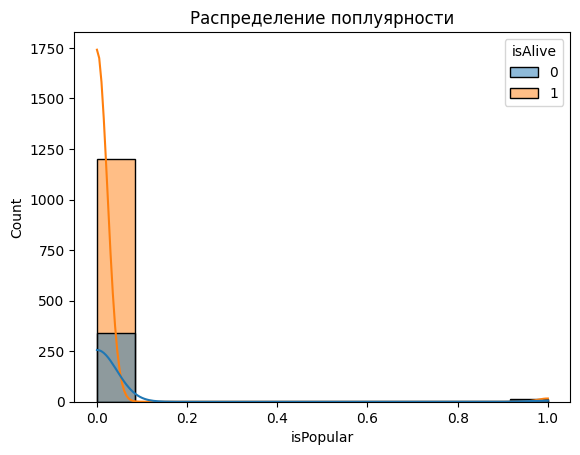

In [184]:
import seaborn as sns
sns.histplot(data=df_train, x='isPopular', hue='isAlive', kde=True)
plt.title('Распределение поплуярности')
plt.show()

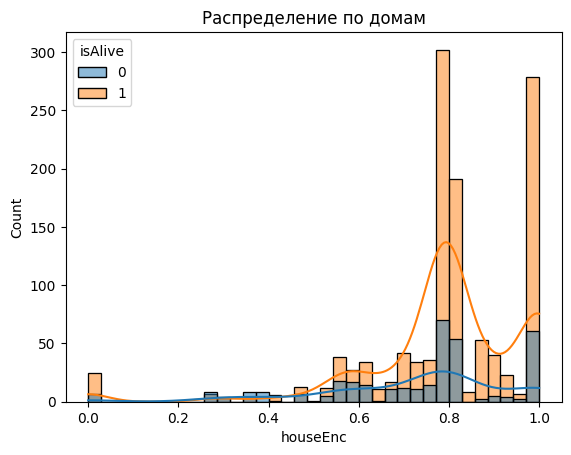

In [185]:
import seaborn as sns
sns.histplot(data=df_train, x='houseEnc', hue='isAlive', kde=True)
plt.title('Распределение по домам')
plt.show()

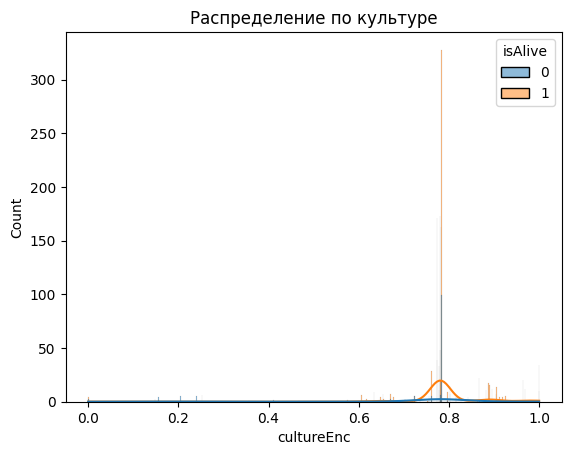

In [186]:
import seaborn as sns
sns.histplot(data=df_train, x='cultureEnc', hue='isAlive', kde=True)
plt.title('Распределение по культуре')
plt.show()

Как мы видим, данные интересные. В целом они отражают важные зависимости между признаками и таргетом. Живых персонажей сильно больше в ~20 летнем возрасте, но при этом часть персонажей в ~20 лет мертвы
Живых женщин явно больше, чем мужчин. Оно и понятно, потому что мужчины больше сражаются.
Популярных людей явно меньше, их практически нет в выборке.


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [187]:
X = df_train.drop('isAlive', axis=1)
y = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [190]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [191]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [192]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_log = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [193]:
# Шаг 1. создание модели
ada_boost_cls = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)

# Шаг 2. обучение модели
ada_boost_cls.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost_cls.predict(X_test)

In [194]:
# Шаг 1. создание модели
random_forest_cls = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)

# Шаг 2. обучение модели
random_forest_cls.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_rndm_forest = random_forest_cls.predict(X_test)

In [195]:
# Шаг 1. создание модели
gauss_process_cls = GaussianProcessClassifier()

# Шаг 2. обучение модели
gauss_process_cls.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gauss_process_cls = gauss_process_cls.predict(X_test)

In [196]:
# Шаг 1. создание модели
gauss_nb = GaussianNB()

# Шаг 2. обучение модели
gauss_nb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gauss_nb = gauss_nb.predict(X_test)

In [197]:
# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

In [198]:
# Шаг 1. создание модели
svc = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

In [199]:
# Шаг 1. создание модели
decision_tree_cls = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Шаг 2. обучение модели
decision_tree_cls.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_decision_tree_cls = decision_tree_cls.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [200]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [201]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_rndm_forest = accuracy_score(y_test, y_pred_rndm_forest)
accuracy_gauss_process_cls = accuracy_score(y_test, y_pred_gauss_process_cls)
accuracy_gauss_nb = accuracy_score(y_test, y_pred_gauss_nb)
accuracy_decision_tree_cls = accuracy_score(y_test, y_pred_decision_tree_cls)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy : %.4f" % accuracy_log)
print("Accuracy : %.4f" % accuracy_ada)
print("Accuracy : %.4f" % accuracy_rndm_forest)
print("Accuracy : %.4f" % accuracy_gauss_process_cls)
print("Accuracy : %.4f" % accuracy_gauss_nb)
print("Accuracy : %.4f" % accuracy_decision_tree_cls)
print("Accuracy : %.4f" % accuracy_knn)
print("Accuracy : %.4f" % accuracy_svc)

Accuracy : 0.7692
Accuracy : 0.7692
Accuracy : 0.7083
Accuracy : 0.7756
Accuracy : 0.7532
Accuracy : 0.7692
Accuracy : 0.7179
Accuracy : 0.7660


Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [202]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.87MB/s]


In [203]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [204]:
predict = gauss_process_cls.predict(df_test)
submission['isAlive'] = predict
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [205]:
submission.to_csv("/content/new_submission.csv", index=False)